<a href="https://colab.research.google.com/github/dlarsson2000/ML4BiotechProject/blob/main/CB206V_Project_Drug_repurposing%20LATEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.9 MB/s eta 0:00:00
   ━━━

In [6]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [7]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/grk2_fp_data.csv')
df_X = dataset.drop(columns=['chembl_id', 'canonical_smiles', 'bioactivity'])
model = setup(data = df_X, target = 'pIC50', train_size=0.8, fold=5)

,Description,Value
0,Session id,5660
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(312, 1025)"
4,Transformed data shape,"(312, 1025)"
5,Transformed train set shape,"(249, 1025)"
6,Transformed test set shape,"(63, 1025)"
7,Numeric features,1024
8,Preprocess,True
9,Imputation type,simple


In [8]:
br = create_model('br', return_train_score=True, fold=5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
print(br)


BayesianRidge()


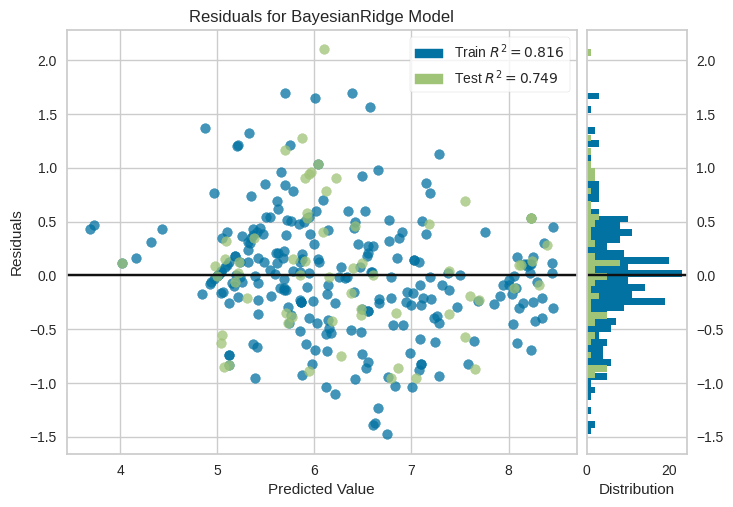

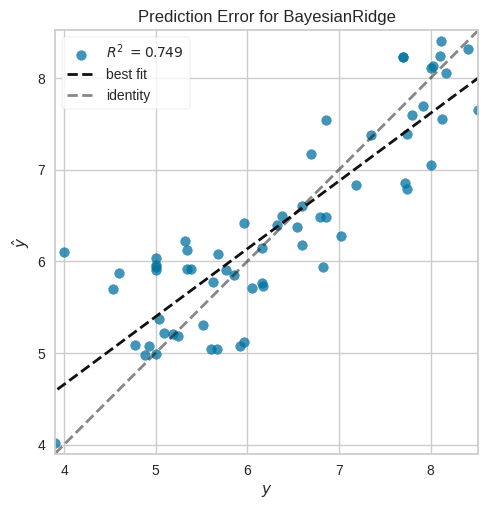

In [10]:


plot_model(br, 'residuals')

plot_model(br, 'error')


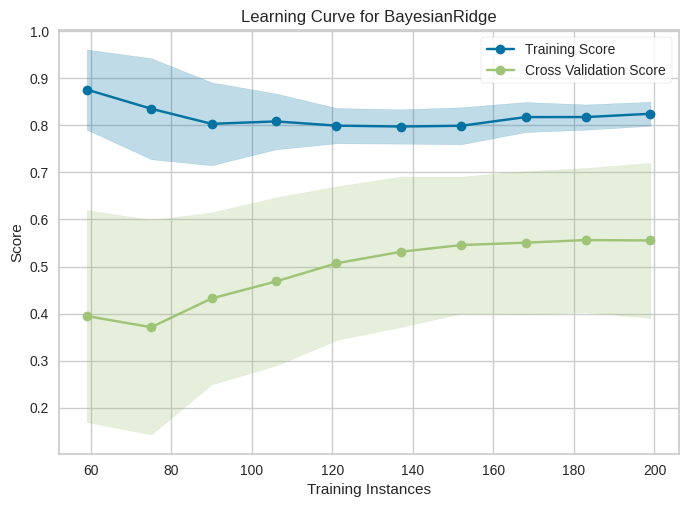

In [11]:
plot_model(br, plot = 'learning')

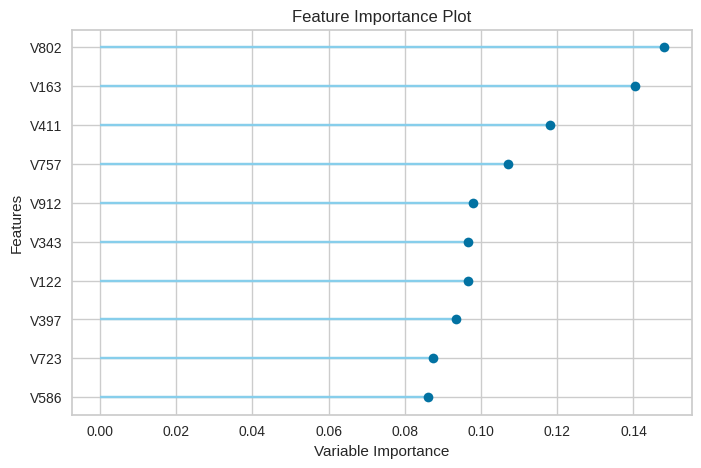

In [12]:
plot_model(br, 'feature')

In [13]:
prediction_holdout = predict_model(br)

prediction_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.4667,0.3762,0.6134,0.7494,0.0909,0.0807


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,pIC50,prediction_label
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.102373,8.236998
141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.000000,5.964247
110,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.376751,6.490659
106,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.161151,6.145091
296,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.721246,6.856655


In [15]:
# read prediction data from file
dataset2 = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/drug_phaseIV_fp_data.csv')
dataset2.head(5)


,chembl_id,canonical_smiles,max_phase,name,V5,V6,V7,V8,V9,V10,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,CHEMBL3833408,O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al...,4,MAGALDRATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL807,CC12CC3CC(C)(C1)CC(N)(C3)C2,4,MEMANTINE,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,CHEMBL30,CN/C(=N\CCSCc1nc[nH]c1C)NC#N,4,CIMETIDINE,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1201354,CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,4,TRIDIHEXETHYL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL453,Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,4,SULFISOXAZOLE,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_new_X = dataset2.drop(columns=['name','chembl_id','canonical_smiles','max_phase'])
df_new_X.head(5)

,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#add all data to the final model
finalize_model(br)

# predict on new data
prediction_newdata = predict_model(br, data = df_new_X)
prediction_newdata.head()


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,prediction_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.756428
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4.942784
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.693358
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.865675
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.893972


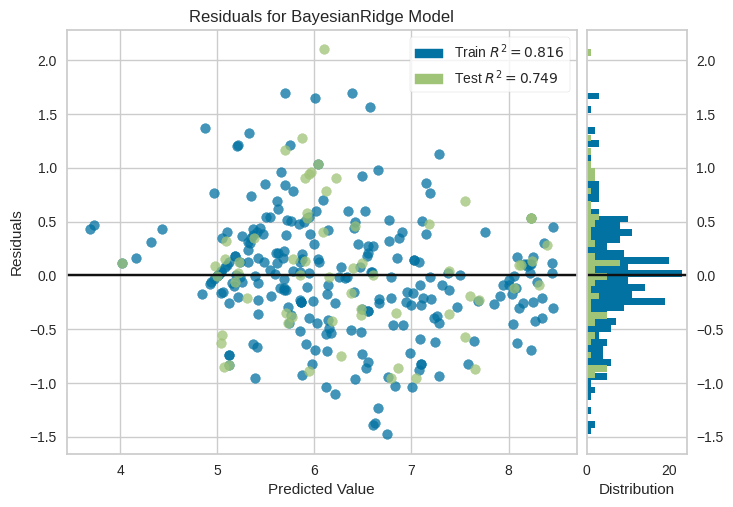

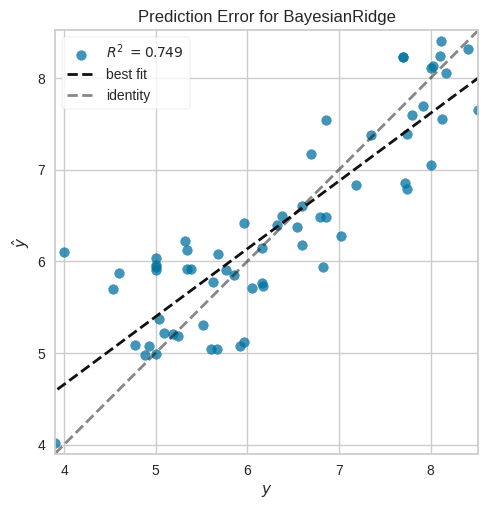

In [18]:
plot_model(br)

plot_model(br, 'error')

In [22]:
evaluate_model(br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
#Visualize the data

#Take the names from the df_new
names = dataset2['name'].values
print(names[:5])
col_names = names.reshape(-1, 1) #making the row into a column
#print(col_names[:5])
predictions = prediction_newdata.prediction_label.values
print(predictions[:5])
col_predictions = predictions.reshape(-1, 1) #making the row into a column
#Vertically stack new arrays
pred_names = np.hstack((col_names, col_predictions))
print(pred_names[:5])

['MAGALDRATE' 'MEMANTINE' 'CIMETIDINE' 'TRIDIHEXETHYL' 'SULFISOXAZOLE']
[4.7564284  4.94278383 4.69335775 4.86567458 4.89397229]
[['MAGALDRATE' 4.756428395898148]
 ['MEMANTINE' 4.942783826722368]
 ['CIMETIDINE' 4.693357745714313]
 ['TRIDIHEXETHYL' 4.865674575976475]
 ['SULFISOXAZOLE' 4.893972293990278]]


In [20]:
#Select the top 20 values
# Convert the second column (values) to float for sorting
pred_names[:, 1] = pred_names[:, 1].astype(float)

# Sort the array by the second column (values) in descending order
sorted_array = pred_names[pred_names[:, 1].argsort()[::-1]]

# Select the top 20 rows (top 20 values and corresponding names)
top_20 = sorted_array[:20]

# Print the result
print(top_20)

[['BEROTRALSTAT' 6.940147211024197]
 ['ODEVIXIBAT' 6.472756960686026]
 ['TADALAFIL' 6.424126503559306]
 ['OLODATEROL' 6.411033083192689]
 ['LIRAGLUTIDE' 6.383488406380373]
 ['SITAGLIPTIN' 6.303299690793143]
 ['EXENATIDE' 6.268382203447629]
 ['RESERPINE' 6.265180893006689]
 ['PRAMLINTIDE' 6.223347524208348]
 ['ICATIBANT' 6.149378695659212]
 ['VALBENAZINE' 6.095246861495834]
 ['DILTIAZEM' 6.087874797549406]
 ['TENELIGLIPTIN' 6.047036885004866]
 ['FOLIC ACID' 5.995064058922269]
 ['TENAPANOR' 5.987003254576348]
 ['RESCINNAMINE' 5.979137604641222]
 ['LINACLOTIDE' 5.9587603163347485]
 ['IBUDILAST' 5.93473241540144]
 ['RIMONABANT' 5.91602827736494]
 ['ZOPICLONE' 5.893669277757603]]


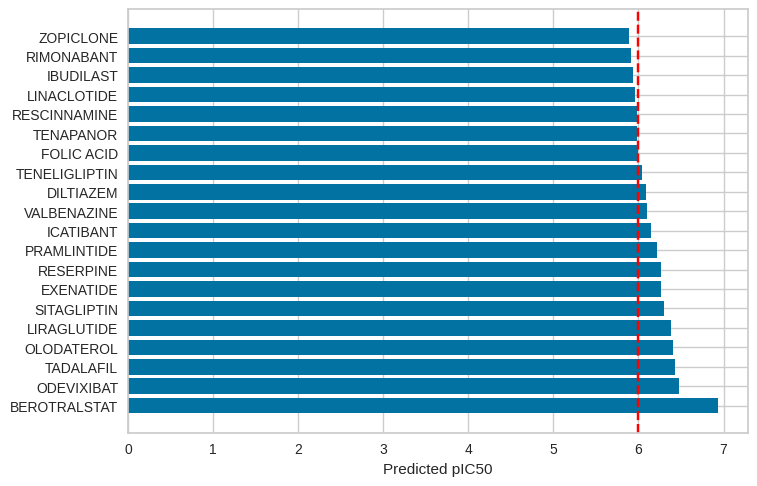

In [21]:
import matplotlib.pyplot as plt

# Select the first column for x-axis and the second column for y-axis
x_bar = top_20[:, 0]  # First column as x-axis
y_bar = top_20[:, 1]  # Second column as y-axis
threshold = 6

# Create a bar plot
plt.barh(x_bar, y_bar)

plt.xlabel('Predicted pIC50')

# Add a horizontal line for the threshold value
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')